In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
books=pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\Book Recommendation System\Books.csv")
ratings=pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\Book Recommendation System\Ratings.csv")
users=pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\Book Recommendation System\Users.csv")

C:\Users\aksha\AppData\Local\Temp\ipykernel_26680\3859990318.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\Book Recommendation System\Books.csv")


## Books

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.shape

(271360, 8)

In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
books.duplicated().sum()

0

In [7]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

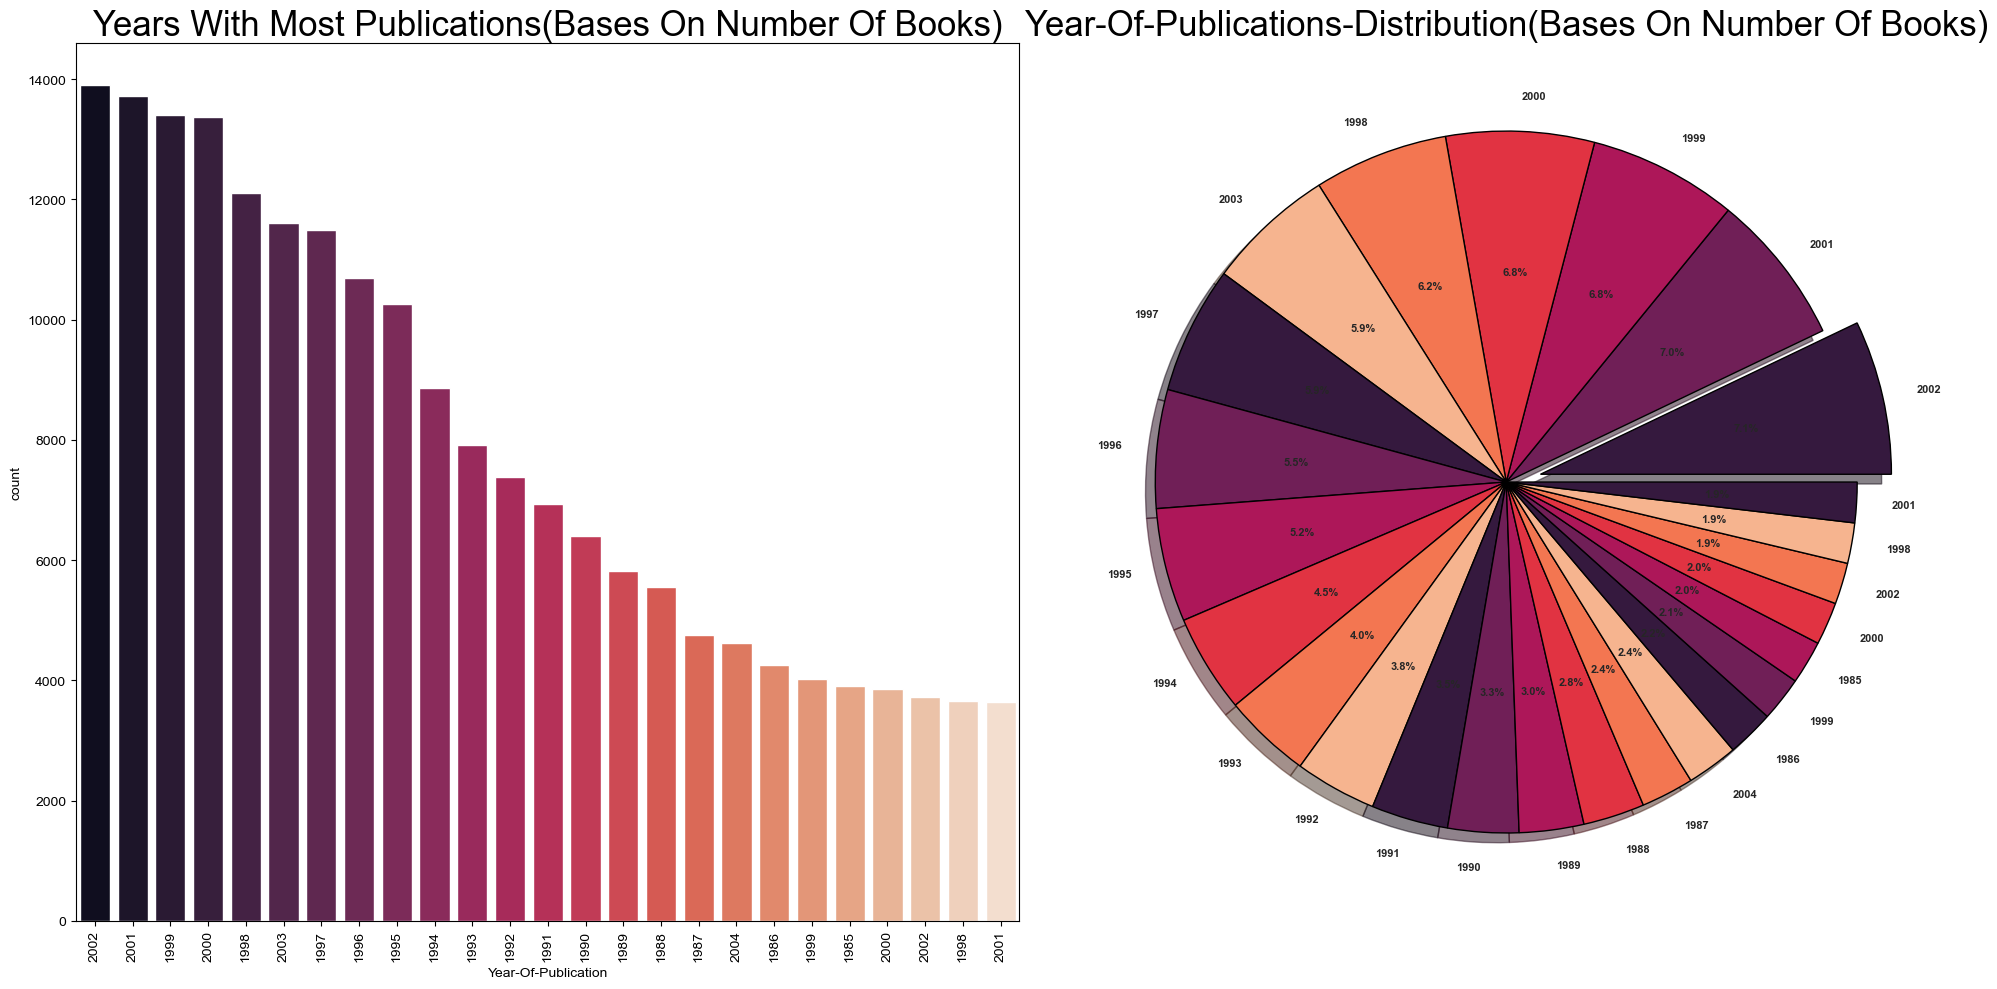

In [8]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
sns.set_style(style='whitegrid')
sns.countplot(x=books['Year-Of-Publication'],data=books,order=books['Year-Of-Publication'].value_counts().index[:25],palette='rocket',ax=axs[0])
axs[0].set_title('Years With Most Publications(Bases On Number Of Books)',fontdict={'fontsize':25,'color':'black'})
axs[0].tick_params(axis='x',labelrotation=90)

color=sns.color_palette('rocket')
axs[1].pie(books['Year-Of-Publication'].value_counts().values[:25], labels=books['Year-Of-Publication'].value_counts().index[:25],
           autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color)
axs[1].set_title('Year-Of-Publications-Distribution(Bases On Number Of Books)',fontdict={'fontsize':25,'color':'black'})

plt.tight_layout()
plt.show()

In [9]:
books['Publisher'].value_counts()

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Ugly Town                     1
Connaught                     1
Name: Publisher, Length: 16807, dtype: int64

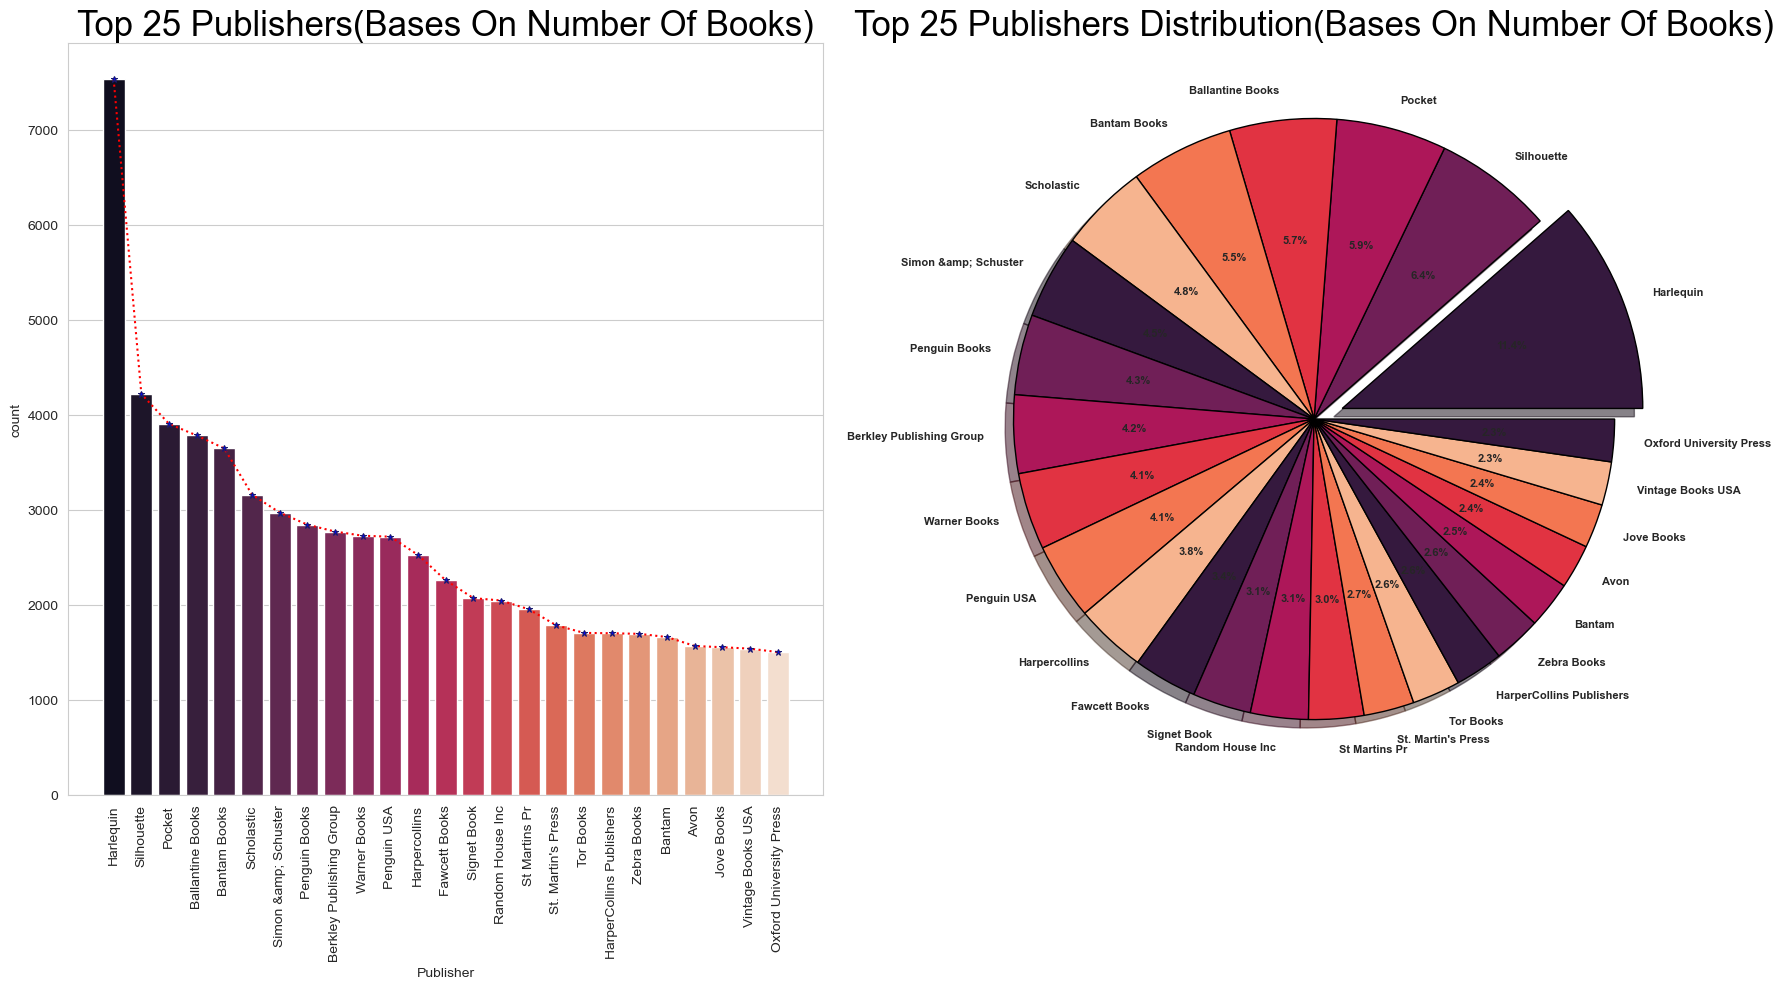

In [10]:
fig,axs=plt.subplots(1,2,figsize=(18,10))
sns.set_style(style='whitegrid')
sns.countplot(x='Publisher',data=books,order=books.Publisher.value_counts().index[:25],palette='rocket',ax=axs[0])
sns.lineplot(x=books['Publisher'].value_counts().index[:25],y=books['Publisher'].value_counts().values[:25],linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',ax=axs[0])

axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_title('Top 25 Publishers(Bases On Number Of Books)',fontdict={'fontsize':25,'color':'black'})

color=sns.color_palette('rocket')

axs[1].pie(books.Publisher.value_counts().values[:25],labels=books.Publisher.value_counts().index[:25],
        autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color)
axs[1].set_title('Top 25 Publishers Distribution(Bases On Number Of Books)',fontdict={'fontsize':25,'color':'black'})

plt.tight_layout()

plt.show()

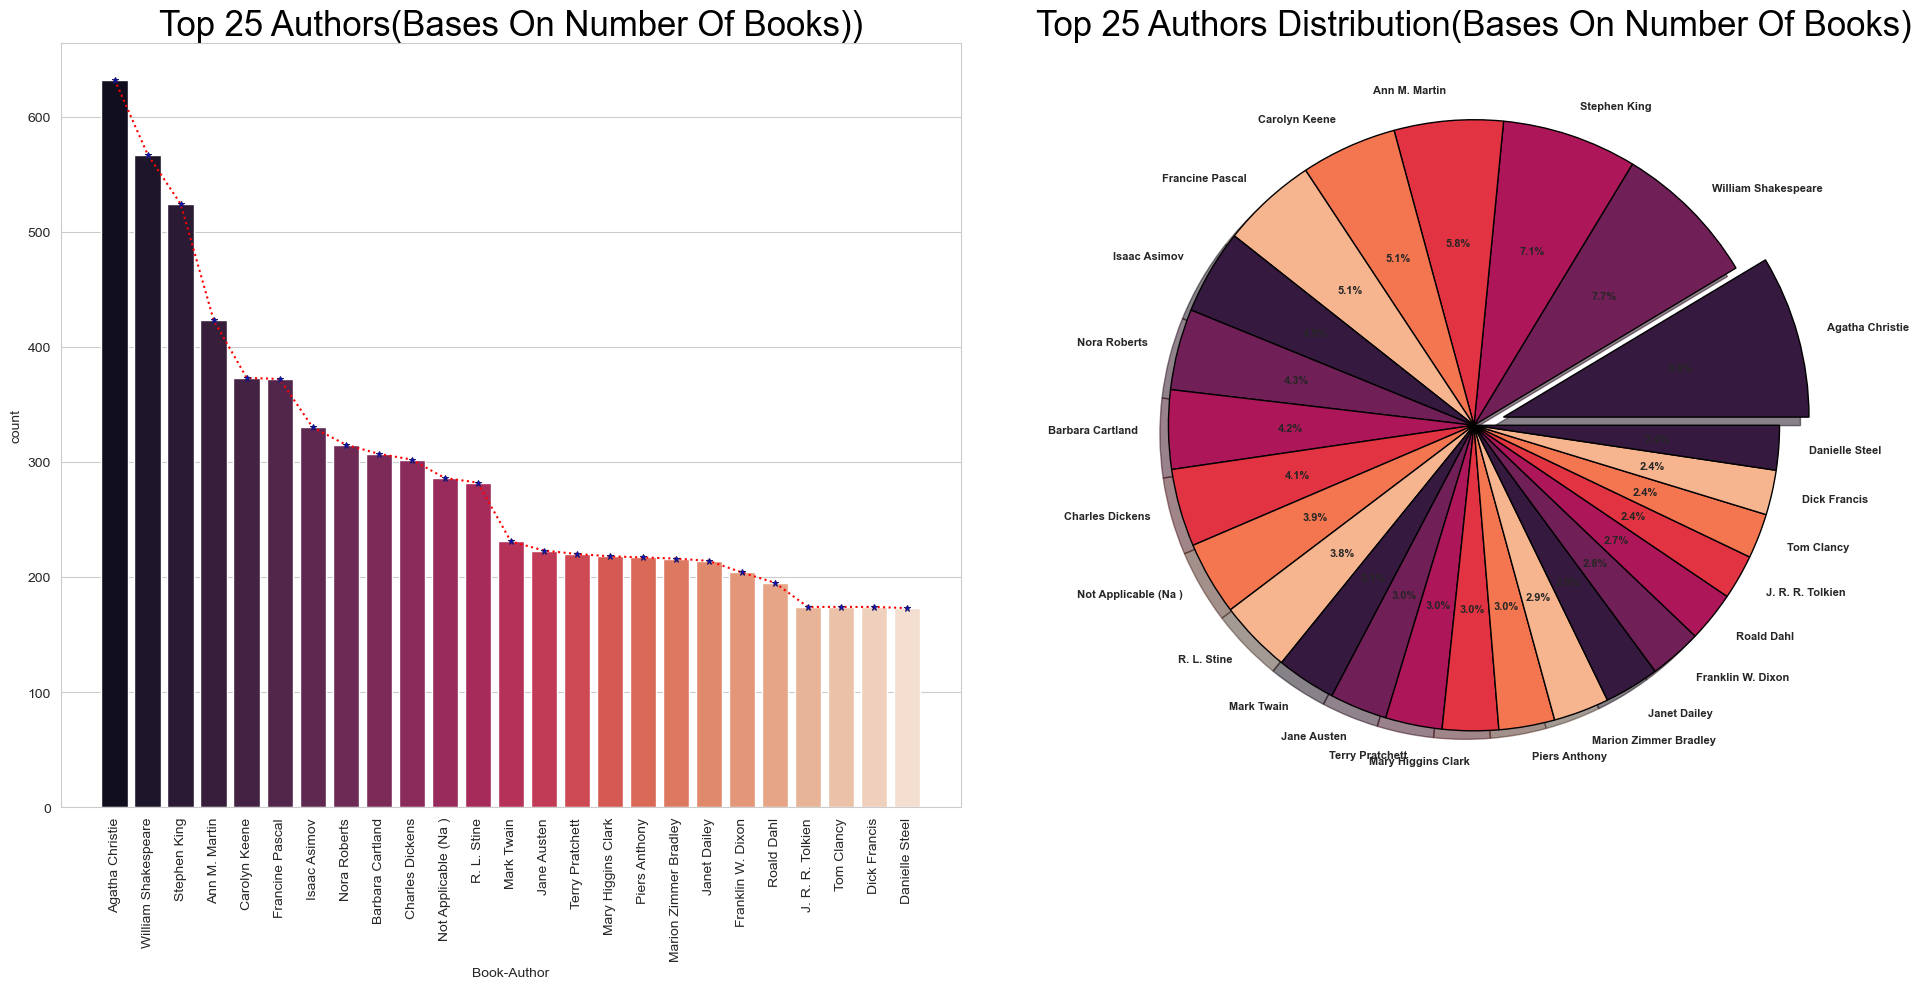

In [11]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x='Book-Author',data=books,order=books['Book-Author'].value_counts().index[:25],palette="rocket",ax=axs[0])
sns.lineplot(x=books['Book-Author'].value_counts().index[:25],y=books['Book-Author'].value_counts().values[:25],linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',ax=axs[0])

axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_title('Top 25 Authors(Bases On Number Of Books))',fontdict={'fontsize':25,'color':'black'})

color=sns.color_palette('rocket')

axs[1].pie(books['Book-Author'].value_counts().values[:25],labels=books['Book-Author'].value_counts().index[:25],
        autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color)
axs[1].set_title('Top 25 Authors Distribution(Bases On Number Of Books)',fontdict={'fontsize':25,'color':'black'})

plt.tight_layout()

plt.show()

In [12]:
len(books['Book-Title'])

271360

In [13]:
len(books['Book-Title'].unique())

242135

In [14]:
books['Book-Title'].value_counts()

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                            

In [15]:
books['Book-Title'].duplicated().sum()

29225

In [16]:
books[books['Book-Title']=='Selected Poems']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39416,0811201465,Selected Poems,K. Patchen,1957,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41316,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106885,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118775,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...
127462,0520012984,Selected Poems,Paul Verlaine,1970,University of California Press,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...
156894,0871401541,Selected Poems,E. E. Cummings,1994,Liveright Publishing Corporation,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...
158312,0060909897,Selected Poems,Gwendolyn Brooks,1963,Harpercollins,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...
175602,0571050190,Selected Poems,T. T Gunn,1962,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...
183908,1550651498,Selected Poems,Ralph Gustafson,2001,Vehicule Press,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...


In [17]:
books['ISBN'].duplicated().sum()

0

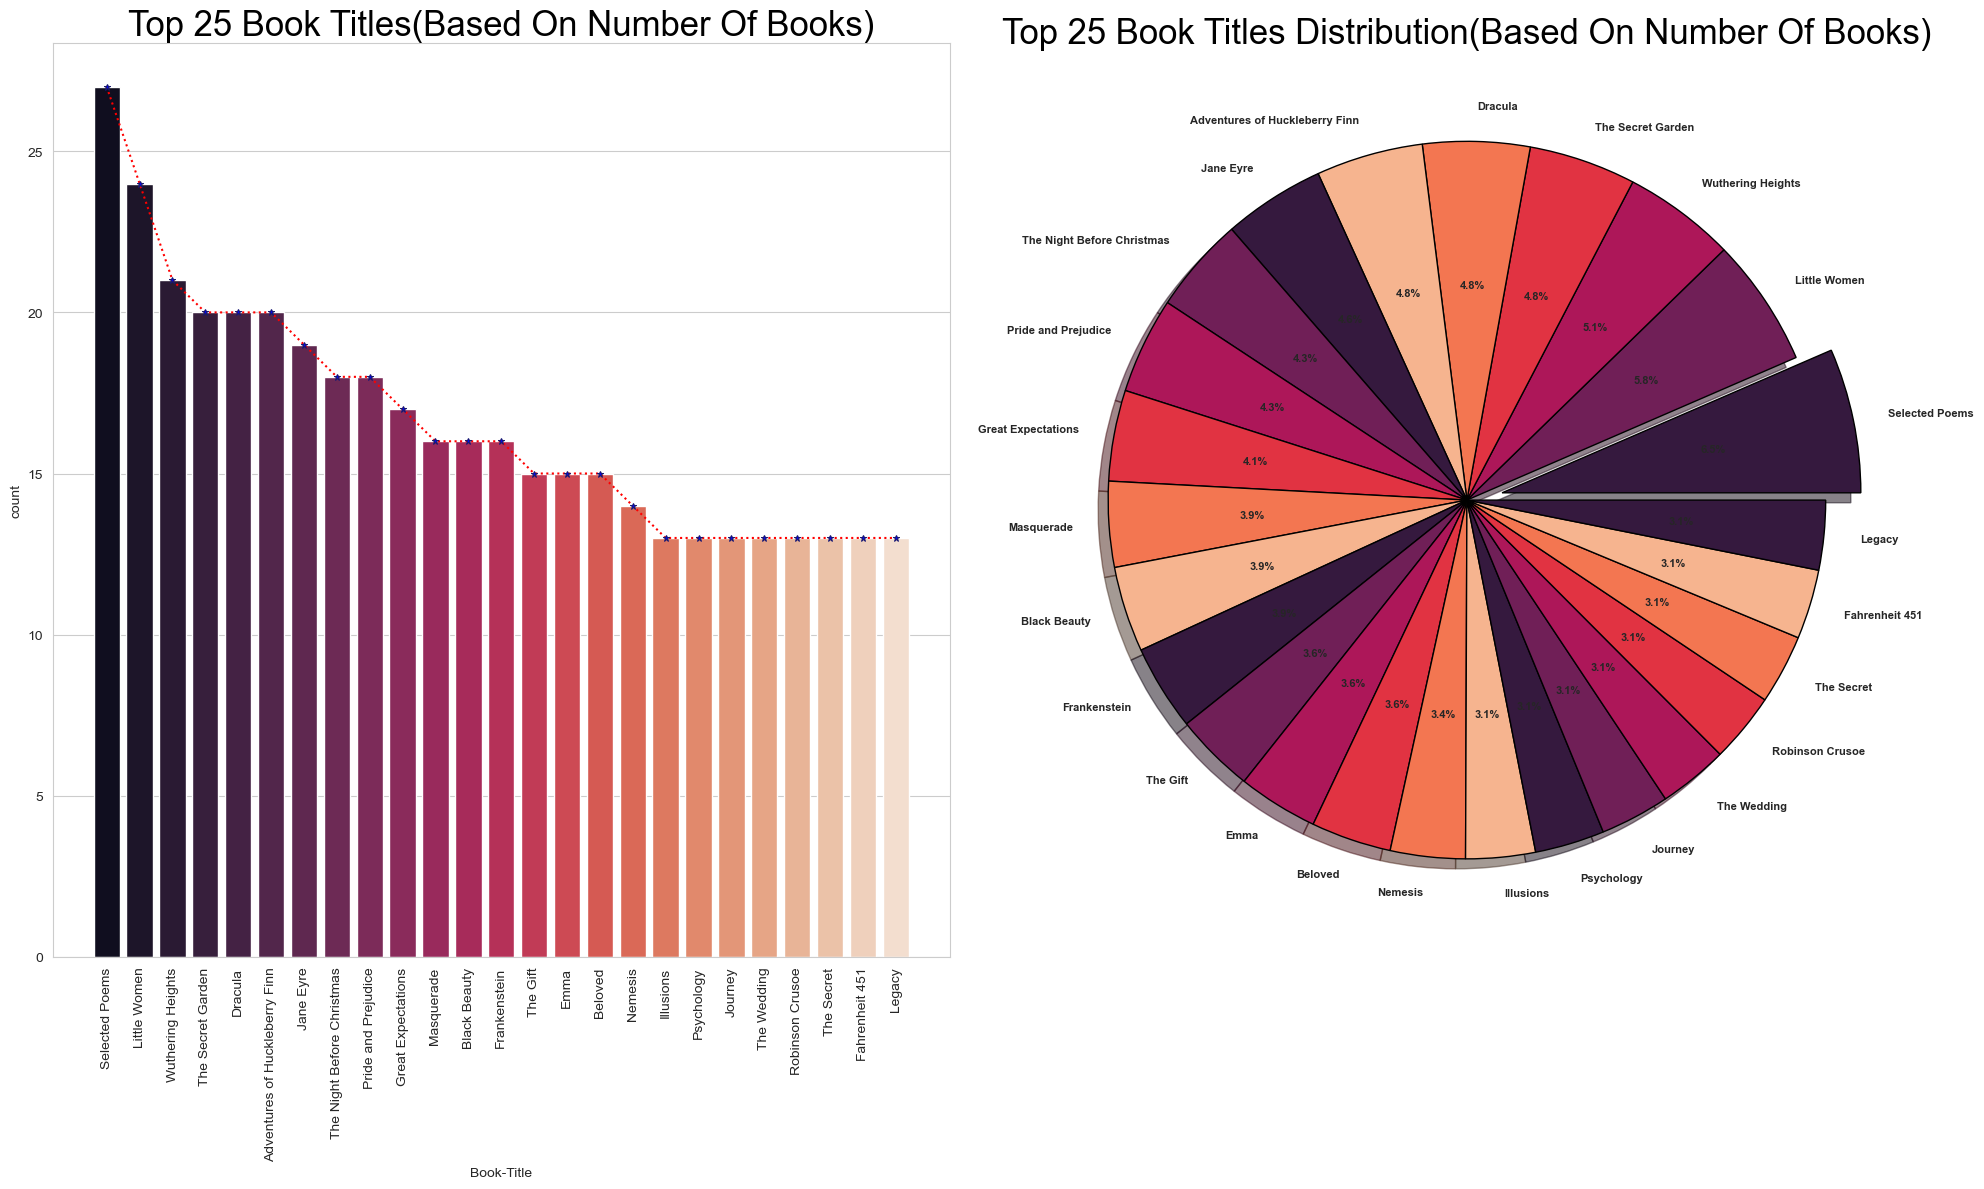

In [18]:
fig,axs=plt.subplots(1,2,figsize=(20,12))
sns.countplot(x='Book-Title',data=books,order=books['Book-Title'].value_counts().index[:25],palette="rocket",ax=axs[0])
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_title('Top 25 Book Titles(Based On Number Of Books)',fontdict={'fontsize':25,'color':'black'})
sns.lineplot(x=books['Book-Title'].value_counts().index[:25],y=books['Book-Title'].value_counts().values[:25],linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',ax=axs[0])

color=sns.color_palette('rocket')

axs[1].pie(books['Book-Title'].value_counts().values[:25],labels=books['Book-Title'].value_counts().index[:25],
        autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color)
axs[1].set_title('Top 25 Book Titles Distribution(Based On Number Of Books)',fontdict={'fontsize':25,'color':'black'})

plt.tight_layout()

plt.show()


## Ratings

In [19]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [21]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [22]:
ratings.shape

(1149780, 3)

## Users

In [23]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [25]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [26]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

## Merge All Datasets

In [27]:
books_ratings=books.merge(ratings,on='ISBN')
books_ratings

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0
...,...,...,...,...,...,...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,276463,7
1031132,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,276680,0
1031134,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,276680,0


In [28]:
books_ratings_user=books_ratings.merge(users,on='User-ID')
new_df=books_ratings_user.copy()

In [29]:
new_df.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [30]:
new_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,"timmins, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...
1031131,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8,"venice, florida, usa",19.0
1031132,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8,"tioga, pennsylvania, usa",39.0
1031133,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10,"madrid, madrid, spain",22.0
1031134,0838934854,Anglo-American Cataloguing Rules,Michael Gorman,1998,American Library Association,259679,6,"grand prairie, texas, usa",27.0


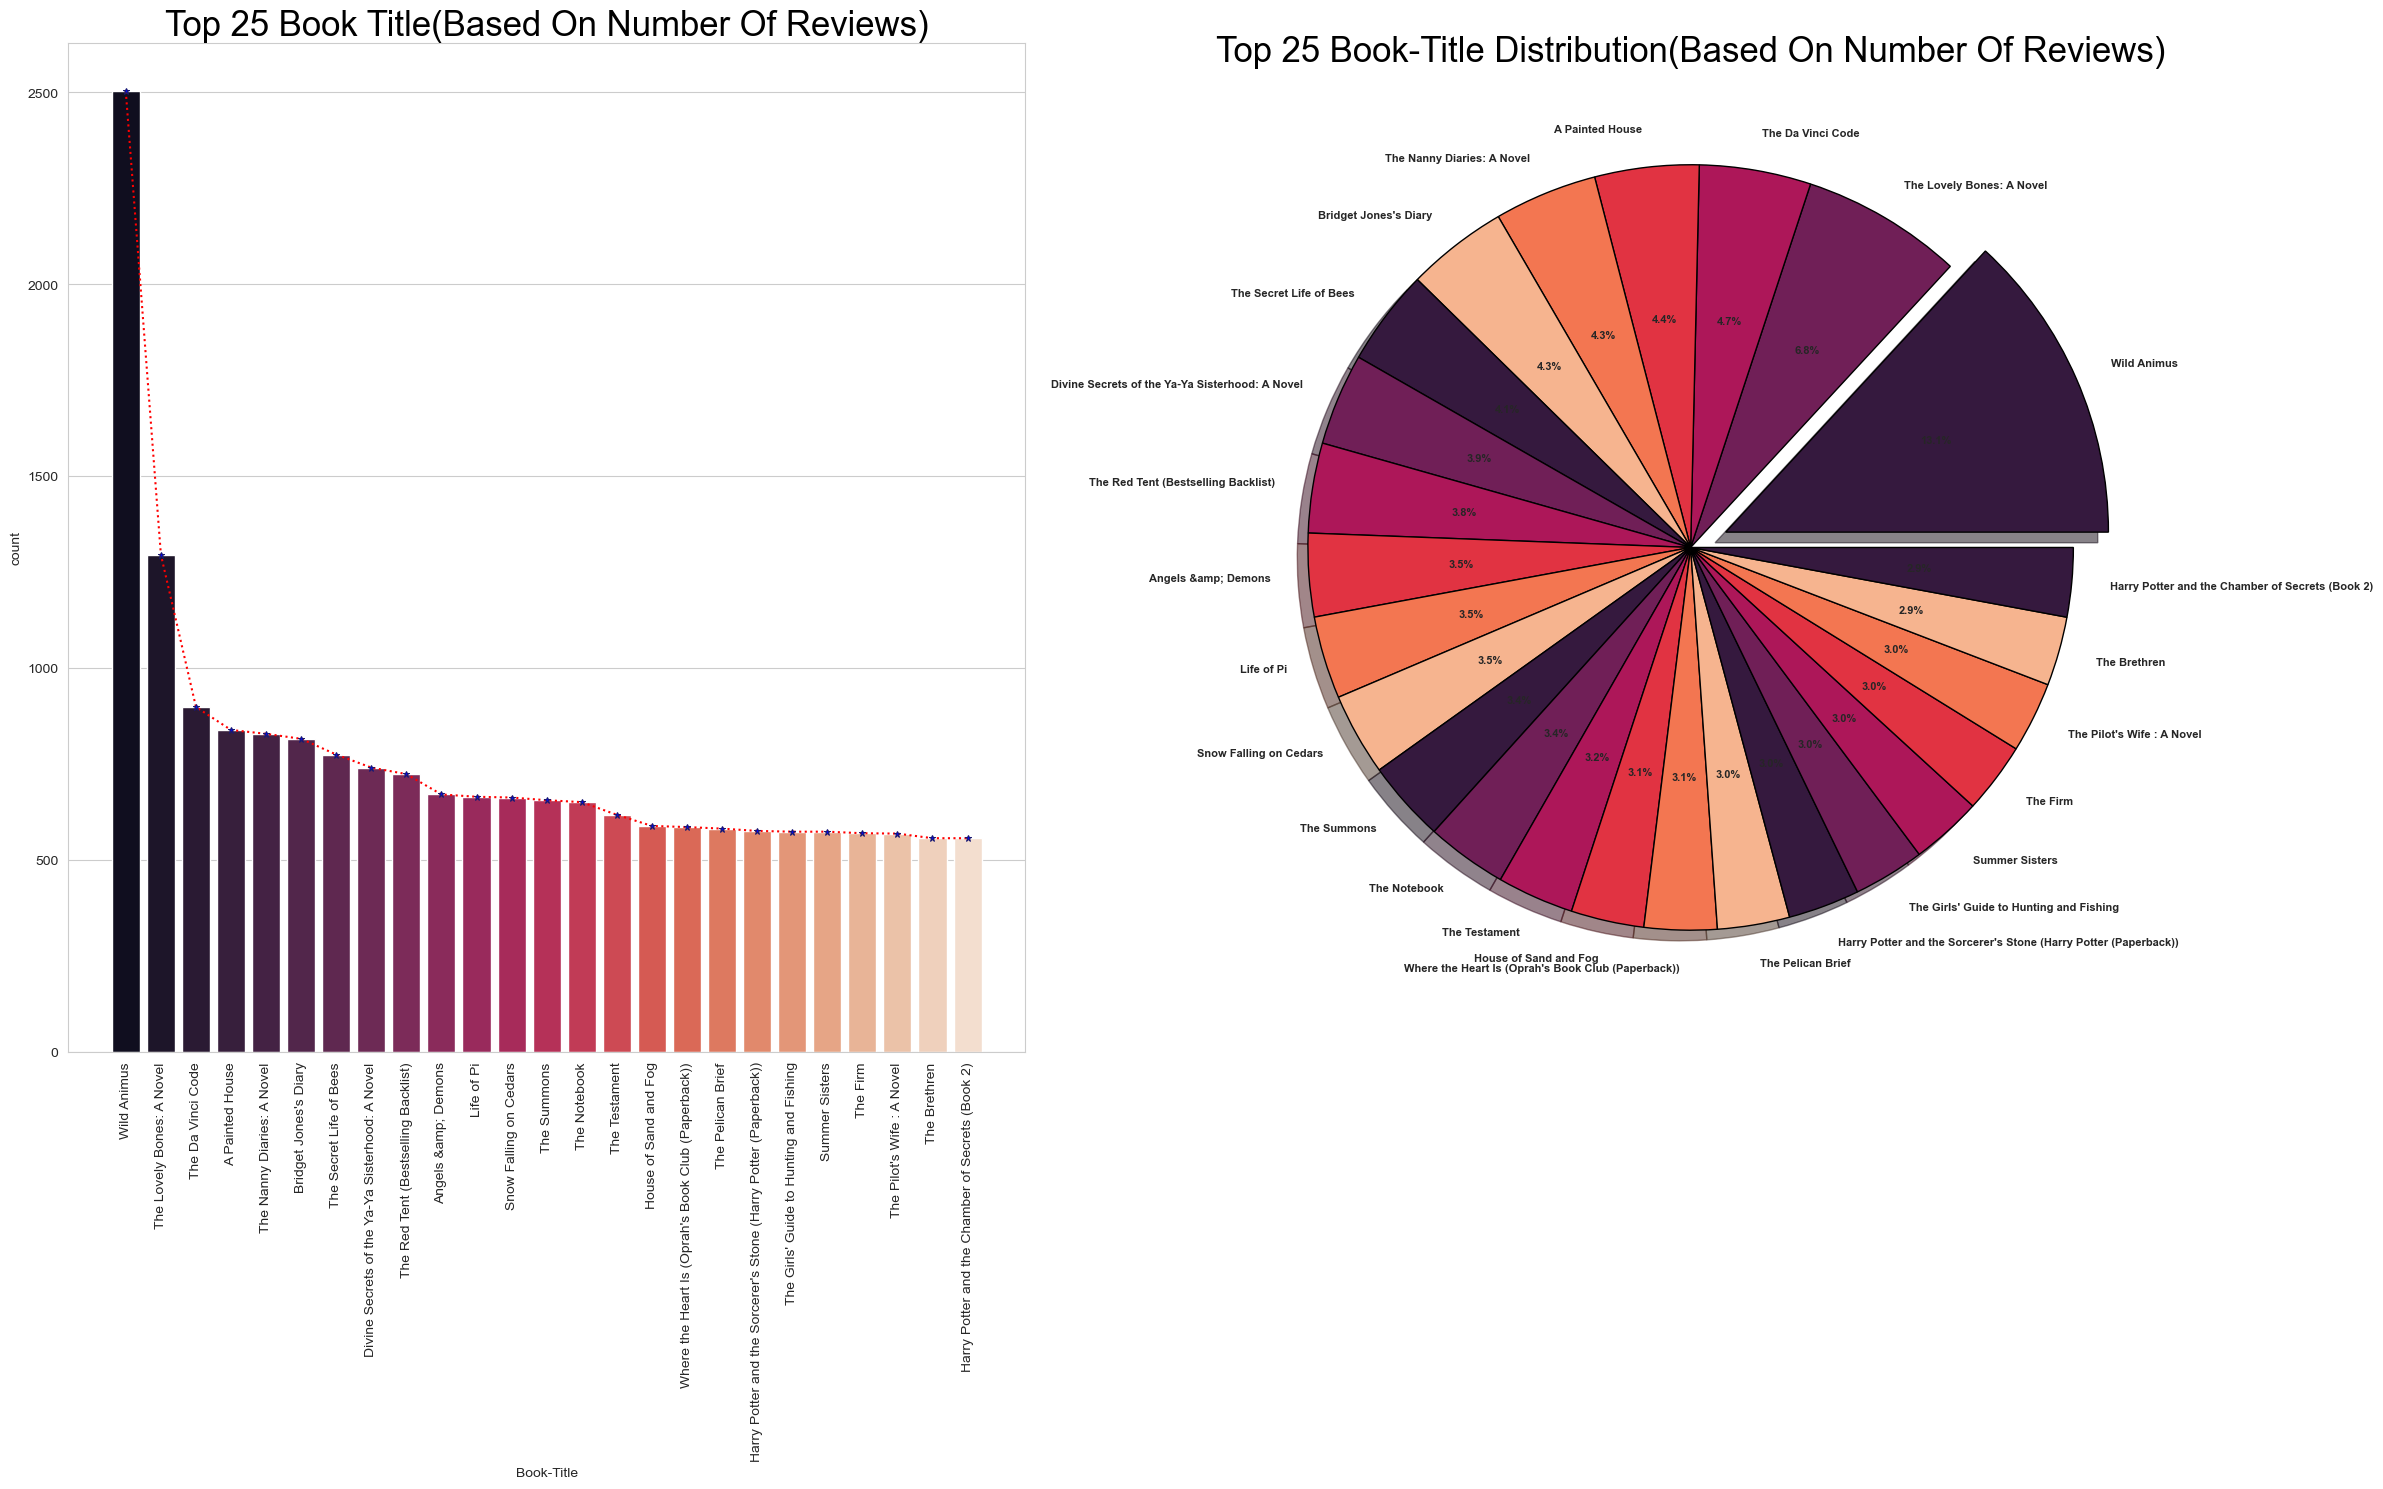

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(24, 15))
sns.countplot(x='Book-Title', data=new_df, order=new_df['Book-Title'].value_counts().index[:25], palette='rocket', ax=axs[0])
axs[0].tick_params(axis='x', labelrotation=90)
axs[0].set_title('Top 25 Book Title(Based On Number Of Reviews)', fontdict={'fontsize': 25, 'color': 'black'})
sns.lineplot(x=new_df['Book-Title'].value_counts().index[:25],y=new_df['Book-Title'].value_counts().values[:25],linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',ax=axs[0])

color_palette = sns.color_palette('rocket')
axs[1].pie(new_df['Book-Title'].value_counts().values[:25], labels=new_df['Book-Title'].value_counts().index[:25],
            autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8,'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color_palette)

axs[1].set_title('Top 25 Book-Title Distribution(Based On Number Of Reviews)', fontdict={'fontsize': 25, 'color': 'black'})

plt.tight_layout()

plt.show()

In [32]:
new_df['User-ID'].value_counts()

11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
51911         1
151772        1
158802        1
243672        1
259920        1
Name: User-ID, Length: 92106, dtype: int64

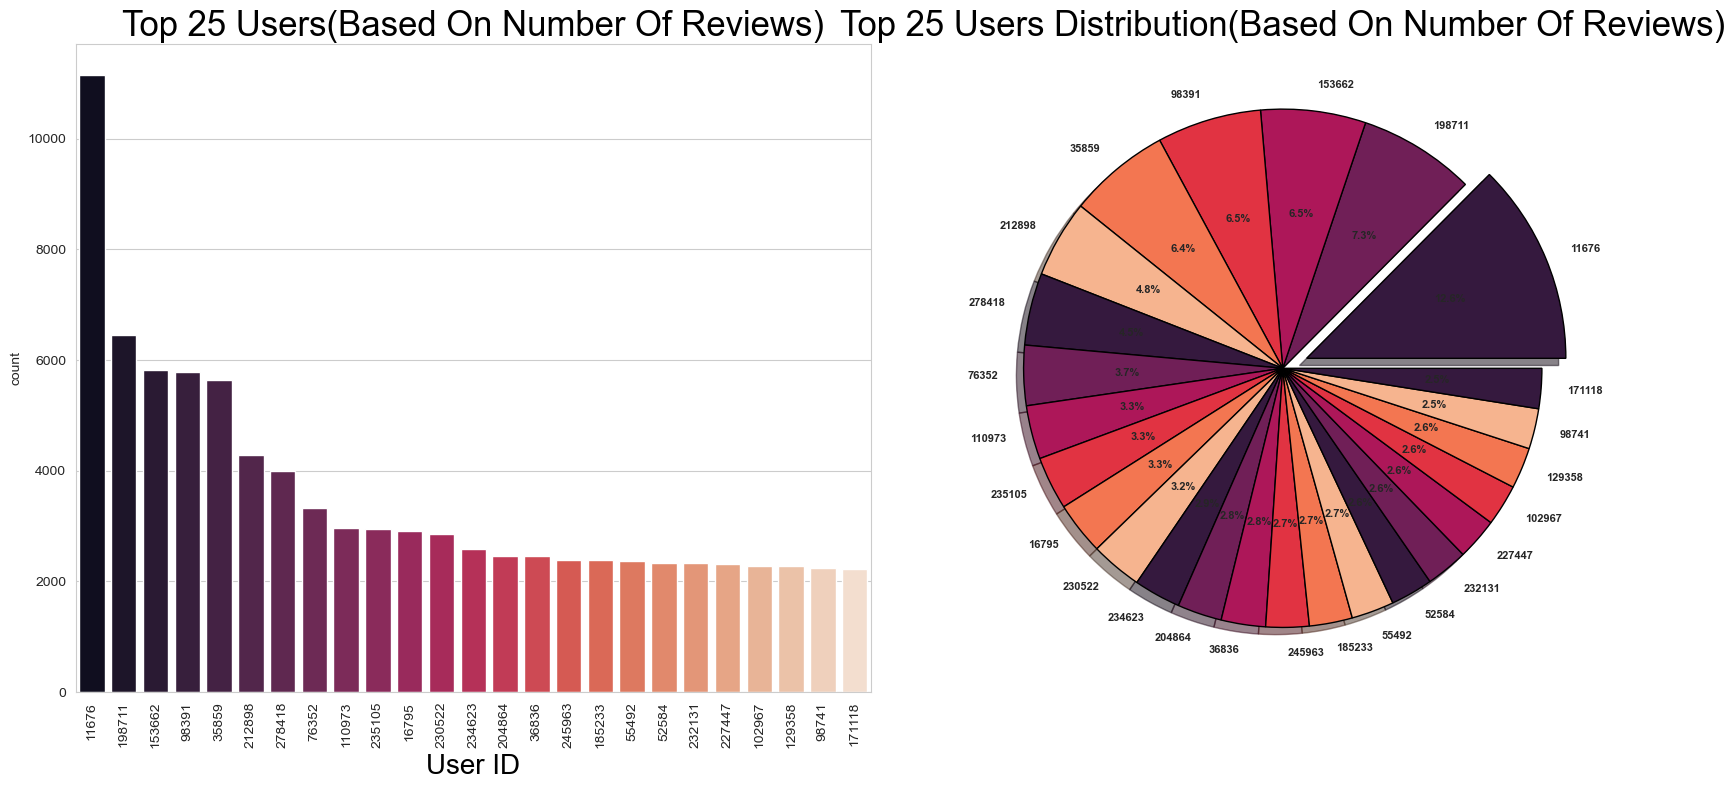

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(17, 8))

sns.countplot(x='User-ID', data=new_df, order=new_df['User-ID'].value_counts().index[:25], palette='rocket', ax=axs[0])
axs[0].tick_params(axis='x', labelrotation=90)
axs[0].set_title('Top 25 Users(Based On Number Of Reviews)', fontdict={'fontsize': 25, 'color': 'black'})
axs[0].set_xlabel('User ID', fontdict={'fontsize': 20, 'color': 'black'})

color_palette = sns.color_palette('rocket')
axs[1].pie(new_df['User-ID'].value_counts().values[:25], labels=new_df['User-ID'].value_counts().index[:25],
            autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color_palette)

axs[1].set_title('Top 25 Users Distribution(Based On Number Of Reviews)', fontdict={'fontsize': 25, 'color': 'black'})

plt.tight_layout()

plt.show()

In [34]:
new_df.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
dtype: int64

In [35]:
new_df.Location.value_counts()

toronto, ontario, canada           14782
n/a, n/a, n/a                      11162
chicago, illinois, usa              8499
seattle, washington, usa            8392
ottawa, ontario, canada             8116
                                   ...  
east ridge, tennessee, usa             1
riposto, sicilia, italy                1
cene, lombardia, italy                 1
puerto sagunto, valencia, spain        1
linclon, nebraska, usa                 1
Name: Location, Length: 22480, dtype: int64

In [36]:
new_df.Location.replace({'n/a, n/a, n/a':np.nan},inplace=True)

In [37]:
users['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

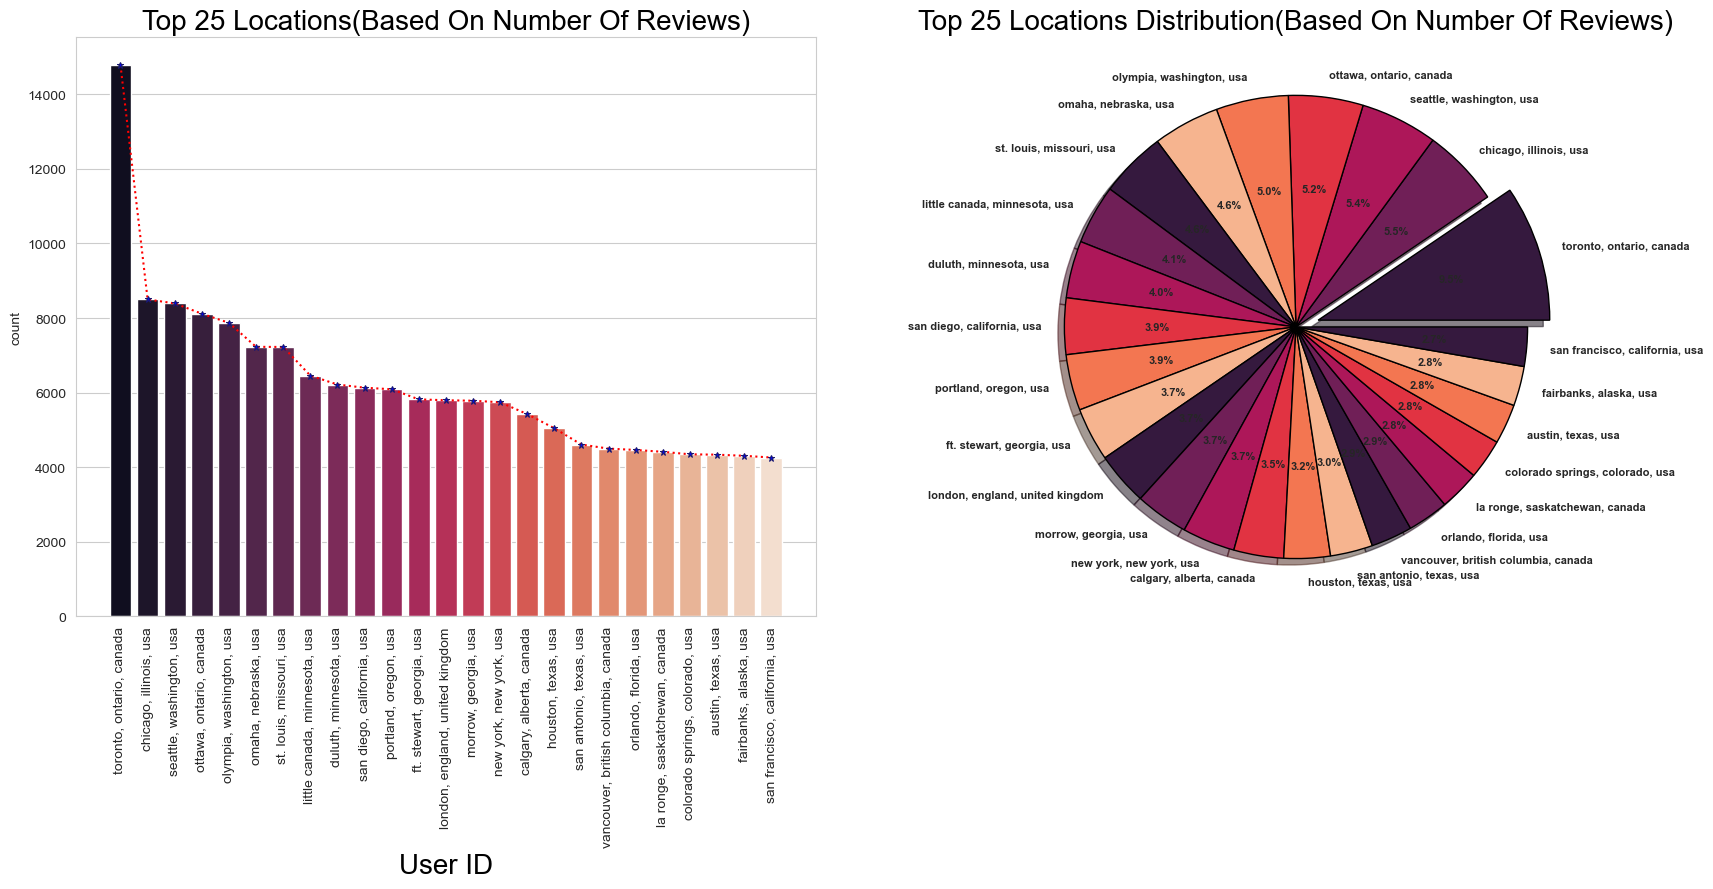

In [38]:
fig,axs=plt.subplots(1,2,figsize=(18,9))
sns.countplot(x='Location',data=new_df,order=new_df.Location.value_counts().index[:25],palette='rocket',ax=axs[0])
sns.lineplot(x=new_df['Location'].value_counts().index[:25],y=new_df['Location'].value_counts().values[:25],linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',ax=axs[0])
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_title('Top 25 Locations(Based On Number Of Reviews)',fontdict={'fontsize':20,'color':'black'})
axs[0].set_xlabel('User ID',fontdict={'fontsize':20,'color':'black'})

color=sns.color_palette('rocket')
axs[1].pie(new_df.Location.value_counts().values[:25],labels=new_df.Location.value_counts().index[:25],
          autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color_palette)
axs[1].set_title('Top 25 Locations Distribution(Based On Number Of Reviews)', fontdict={'fontsize': 20, 'color': 'black'})

plt.tight_layout()
plt.show()

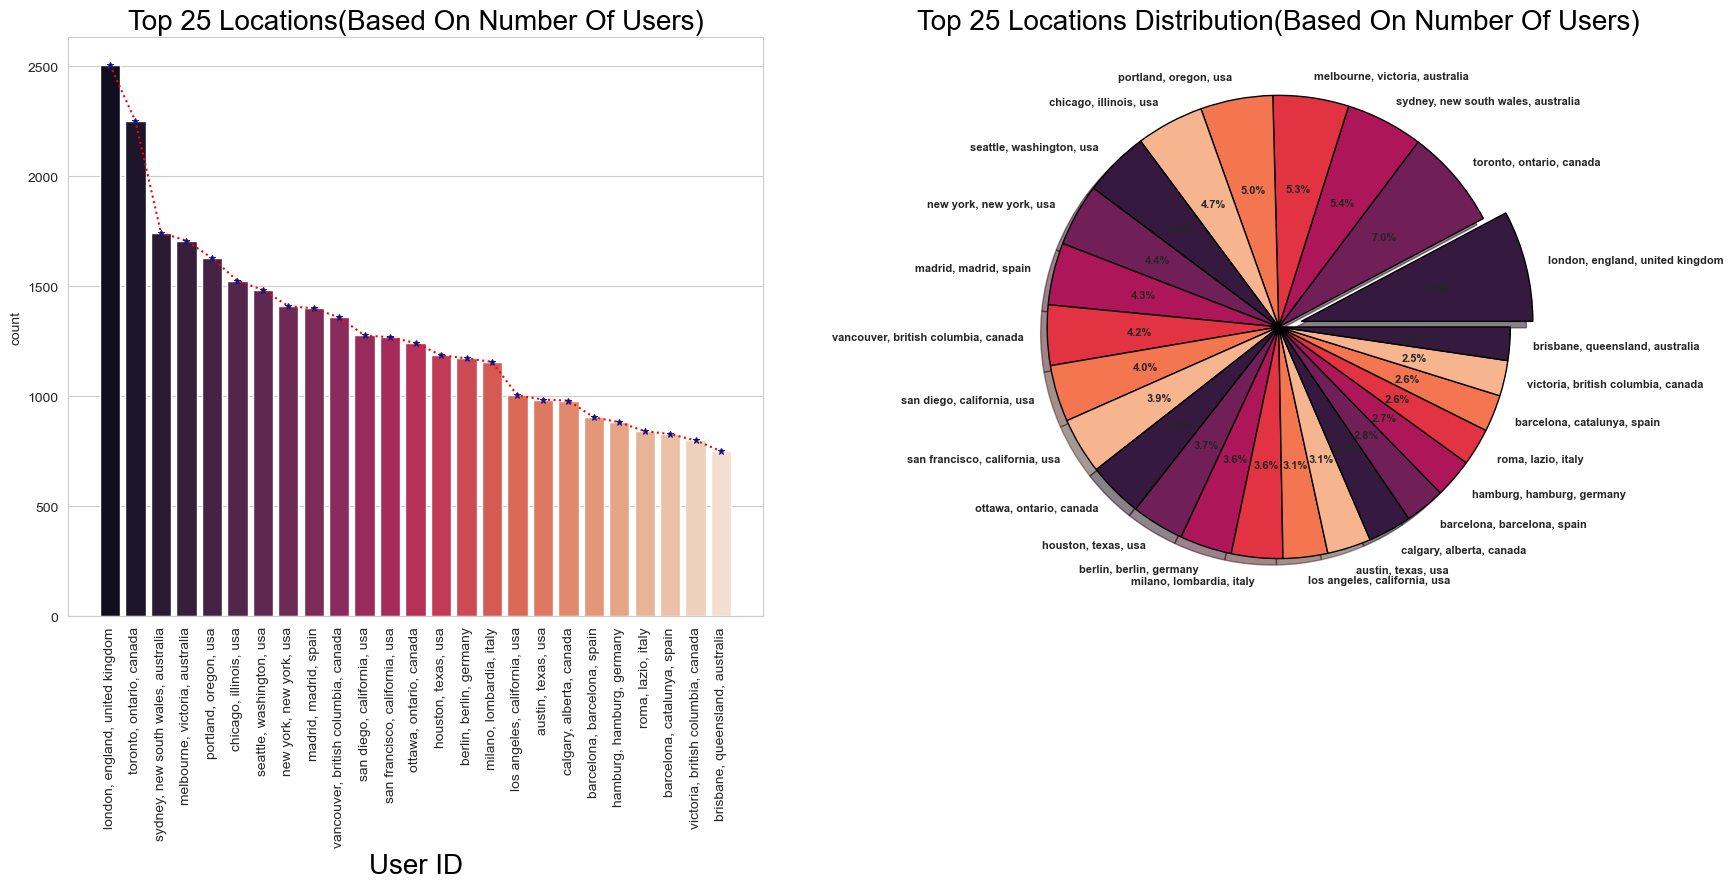

In [39]:
fig,axs=plt.subplots(1,2,figsize=(18,9))
sns.countplot(x='Location',data=users,order=users.Location.value_counts().index[:25],palette='rocket',ax=axs[0])
sns.lineplot(x=users['Location'].value_counts().index[:25],y=users['Location'].value_counts().values[:25],linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',ax=axs[0])
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_title('Top 25 Locations(Based On Number Of Users)',fontdict={'fontsize':20,'color':'black'})
axs[0].set_xlabel('User ID',fontdict={'fontsize':20,'color':'black'})

color=sns.color_palette('rocket')
axs[1].pie(users.Location.value_counts().values[:25],labels=users.Location.value_counts().index[:25],
          autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color_palette)
axs[1].set_title('Top 25 Locations Distribution(Based On Number Of Users)', fontdict={'fontsize': 20, 'color': 'black'})

plt.tight_layout()
plt.show()

In [40]:
new_df.Age.value_counts()

33.0     32862
29.0     30646
30.0     27201
32.0     26490
36.0     26096
         ...  
105.0        1
157.0        1
94.0         1
147.0        1
98.0         1
Name: Age, Length: 141, dtype: int64

In [41]:
new_df.Age.describe()

count    753301.000000
mean         37.397648
std          14.098254
min           0.000000
25%          28.000000
50%          35.000000
75%          45.000000
max         244.000000
Name: Age, dtype: float64

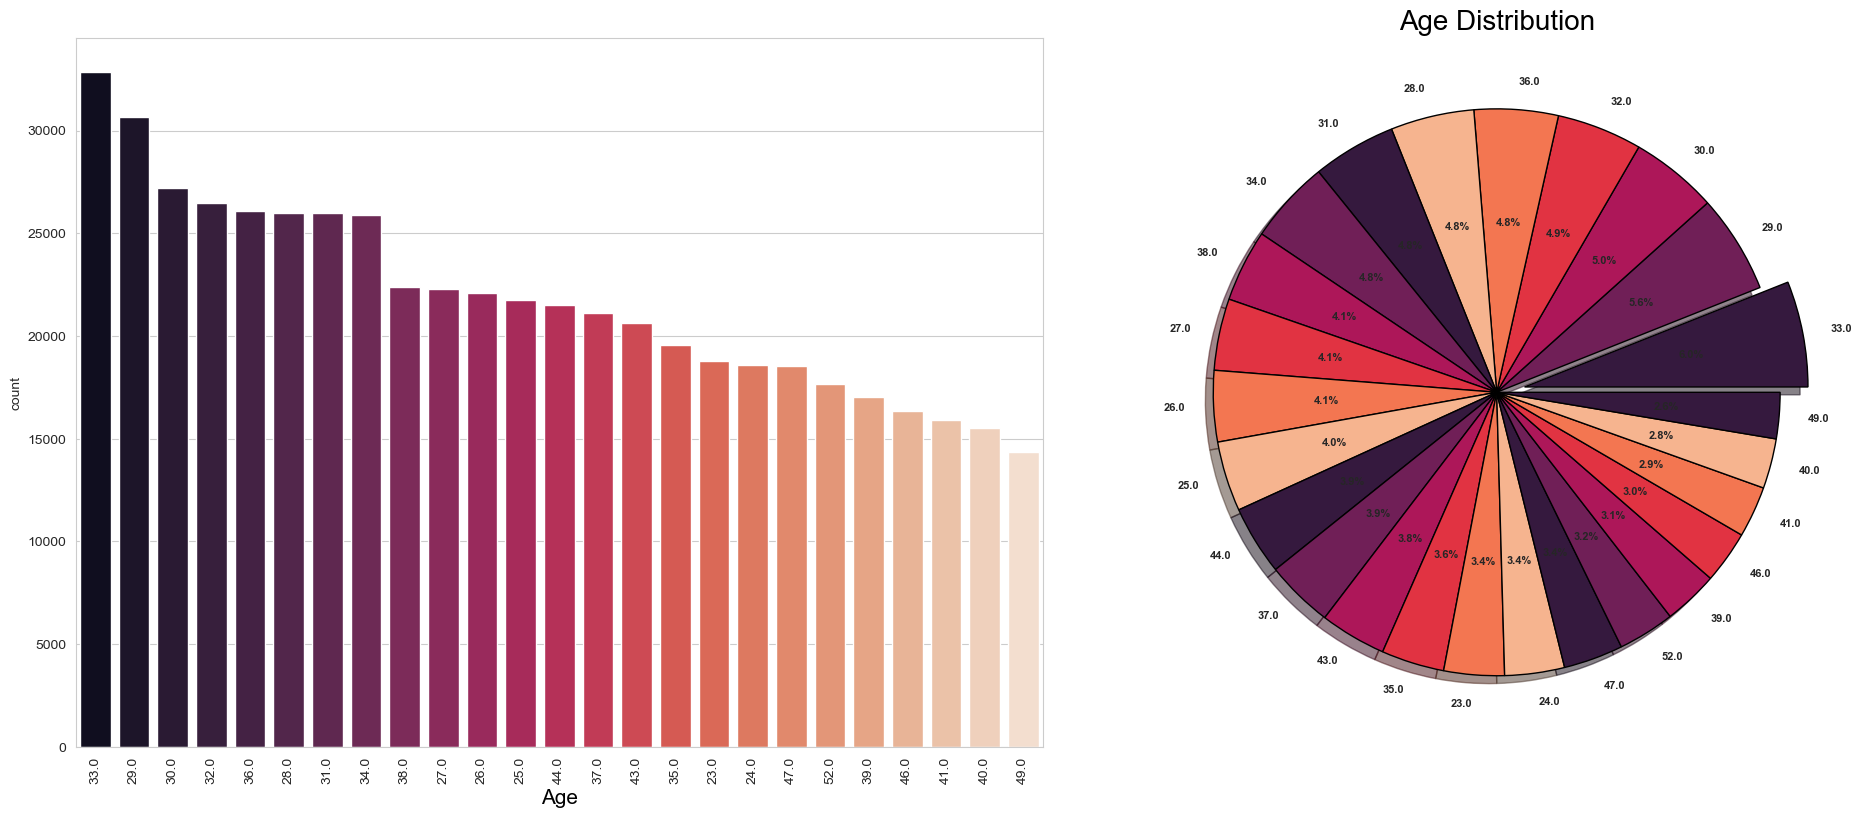

In [42]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='Age',data=new_df,order=new_df.Age.value_counts().index[:25],palette='rocket',ax=axs[0])
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_xlabel('Age',fontdict={'fontsize':15,'color':'black'})

color=sns.color_palette('rocket')
axs[1].pie(new_df.Age.value_counts().values[:25],labels=new_df.Age.value_counts().index[:25],
          autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 8, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color_palette)

plt.tight_layout()
plt.title('Age Distribution',fontdict={'fontsize':20,'color':'black'})
plt.show()

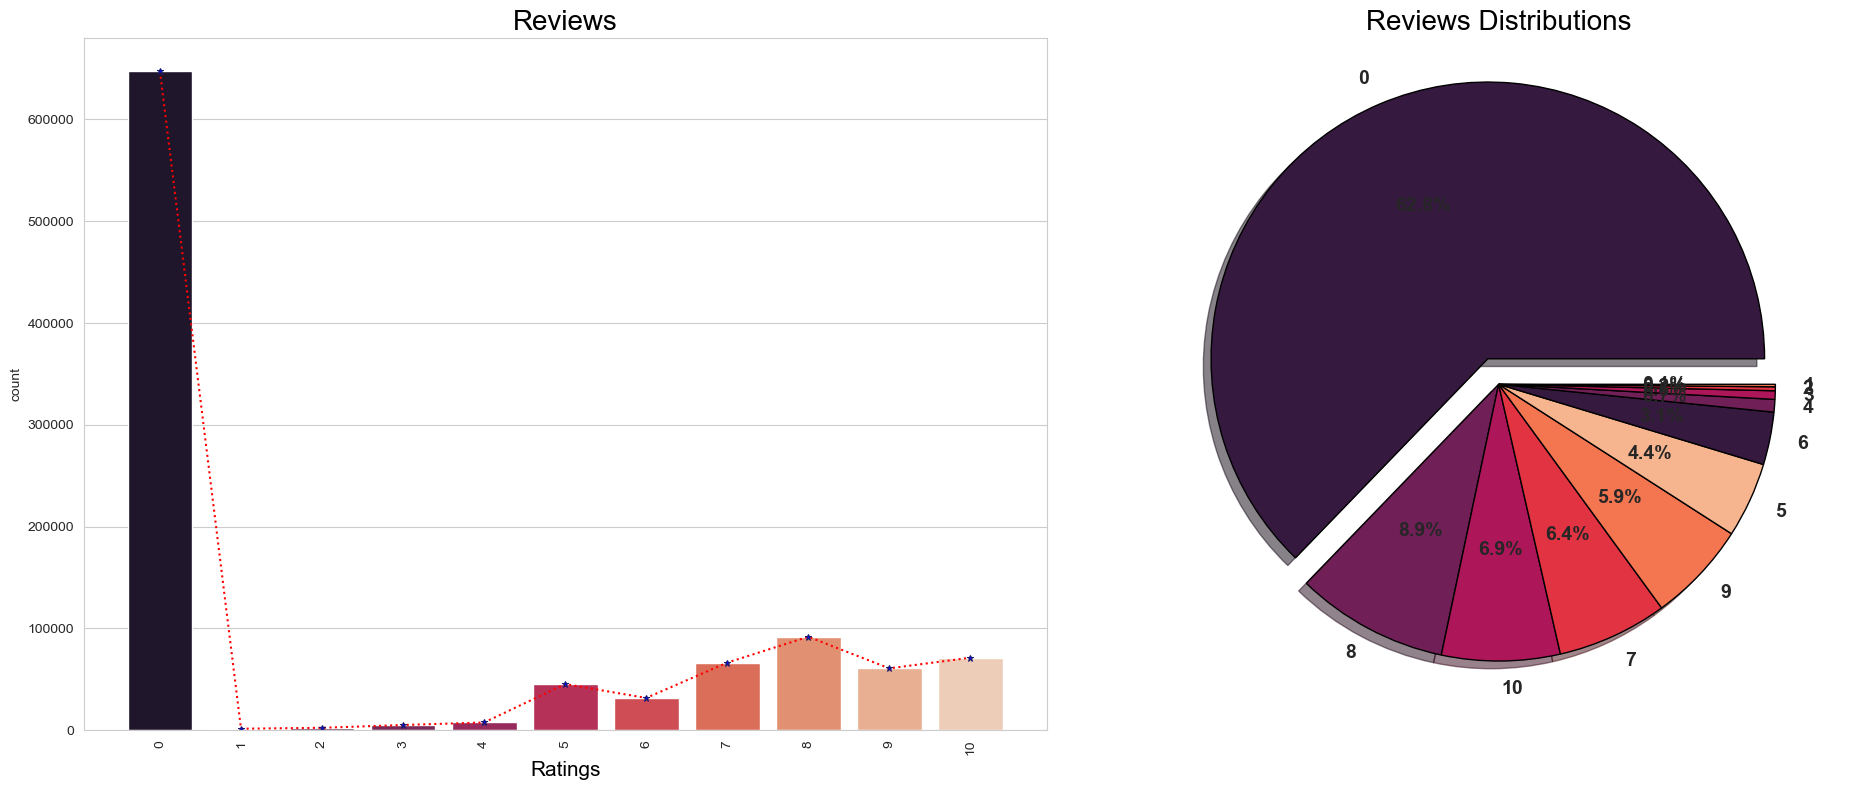

In [43]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='Book-Rating',data=new_df,palette='rocket',ax=axs[0])
sns.lineplot(x=new_df['Book-Rating'].value_counts().index,y=new_df['Book-Rating'].value_counts().values,linestyle='dotted',marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',ax=axs[0])
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_xlabel('Ratings',fontdict={'fontsize':15,'color':'black'})
axs[0].set_title('Reviews',fontdict={'fontsize':20,'color':'black'})

color=sns.color_palette('rocket')
axs[1].pie(new_df['Book-Rating'].value_counts().values,labels=new_df['Book-Rating'].value_counts().index,
          autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 14, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 10,
            colors=color_palette)
axs[1].set_title('Reviews Distributions',fontdict={'fontsize':20,'color':'black'})

plt.tight_layout()

plt.show()

In [44]:
new_df1=new_df[new_df['Book-Rating']!=0]

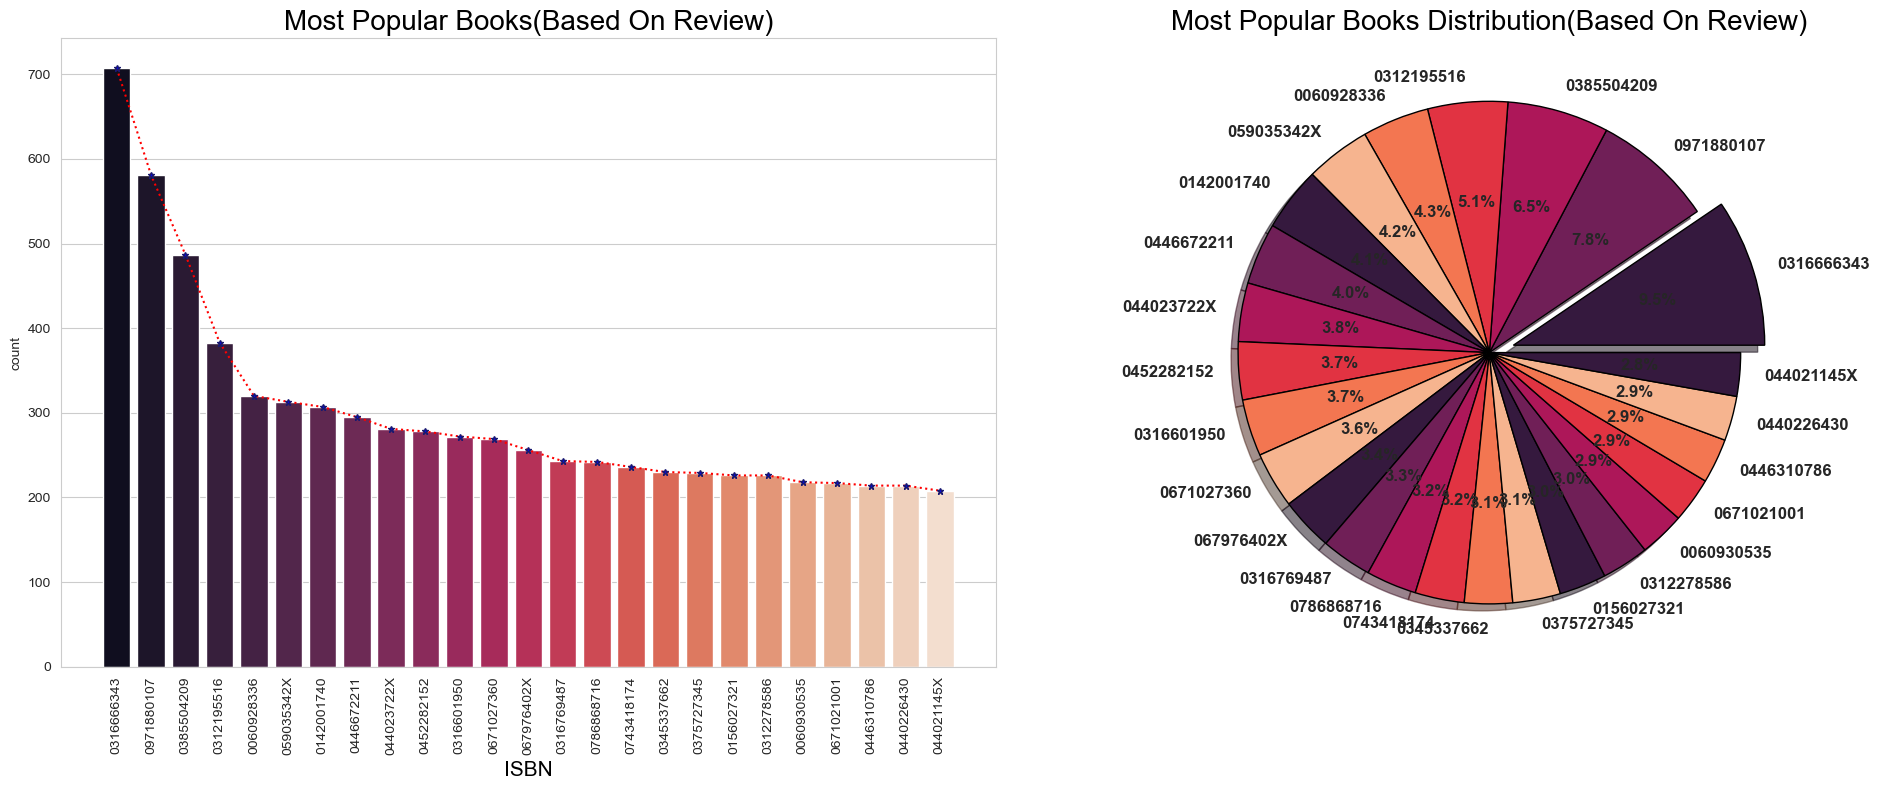

In [45]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x='ISBN',data=new_df1,order=new_df1.ISBN.value_counts().index[:25],palette='rocket',ax=axs[0])
axs[0].plot(new_df1.ISBN.value_counts().index[:25],new_df1.ISBN.value_counts().values[:25],marker='*',markersize=5,markerfacecolor='blue',markeredgecolor='midnightblue',color='red',linestyle='dotted')
axs[0].tick_params(axis='x',labelrotation=90)
axs[0].set_xlabel('ISBN',fontdict={'fontsize':15,'color':'black'})
axs[0].set_title('Most Popular Books(Based On Review)',fontdict={'fontsize':20,'color':'black'})

color=sns.color_palette('rocket')
axs[1].pie(new_df1.ISBN.value_counts().values[:25],labels=new_df1.ISBN.value_counts().index[:25],
          autopct='%0.1f%%',
            shadow=True,
            textprops={'fontsize': 12, 'fontweight': 'bold'},
            wedgeprops={'edgecolor': 'black'},
            explode=[0.1] + [0.0] * 24,
            colors=color_palette)
axs[1].set_title('Most Popular Books Distribution(Based On Review)',fontdict={'fontsize':20,'color':'black'})
plt.tight_layout()
plt.show()

In [46]:
two=pd.DataFrame(new_df.groupby('Book-Author').agg('mean',numeric_only=True)['Book-Rating'].sort_values(ascending=False))
three=two[two['Book-Rating']!=10.0][:25]

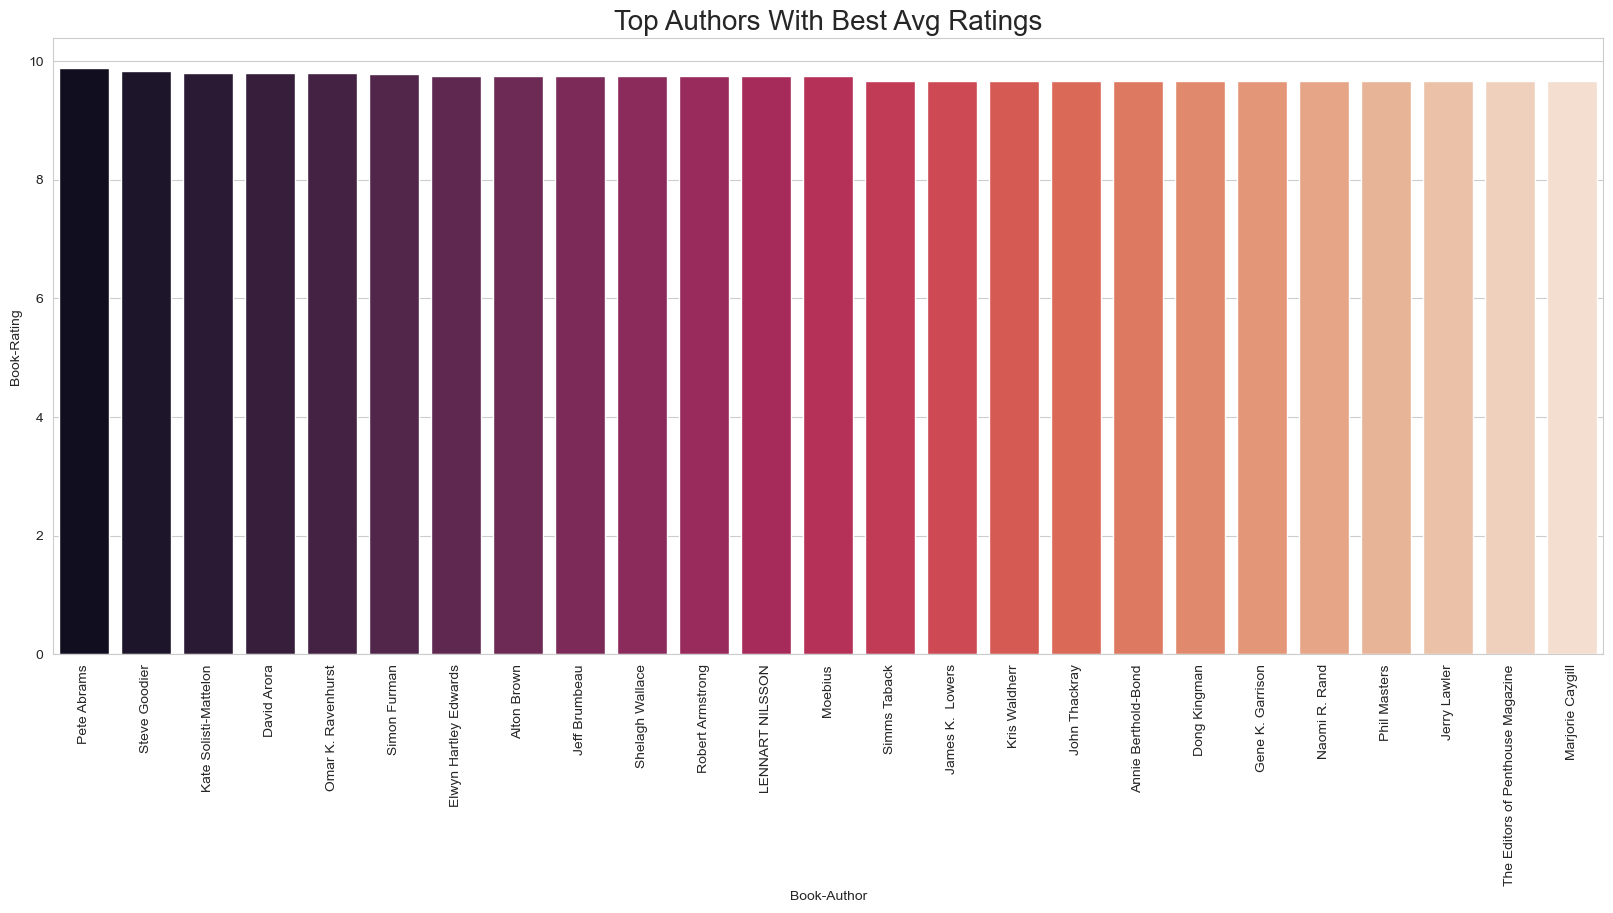

In [47]:
plt.figure(figsize=(20,8))
ax=sns.barplot(data=three,x=three.index,y='Book-Rating',palette='rocket')
ax.tick_params(axis='x',labelrotation=90)
plt.title('Top Authors With Best Avg Ratings',fontdict={'fontsize':20})

plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_37880\1918847795.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  four=pd.DataFrame(new_df.groupby('ISBN').agg('mean')['Book-Rating'].sort_values(ascending=False))


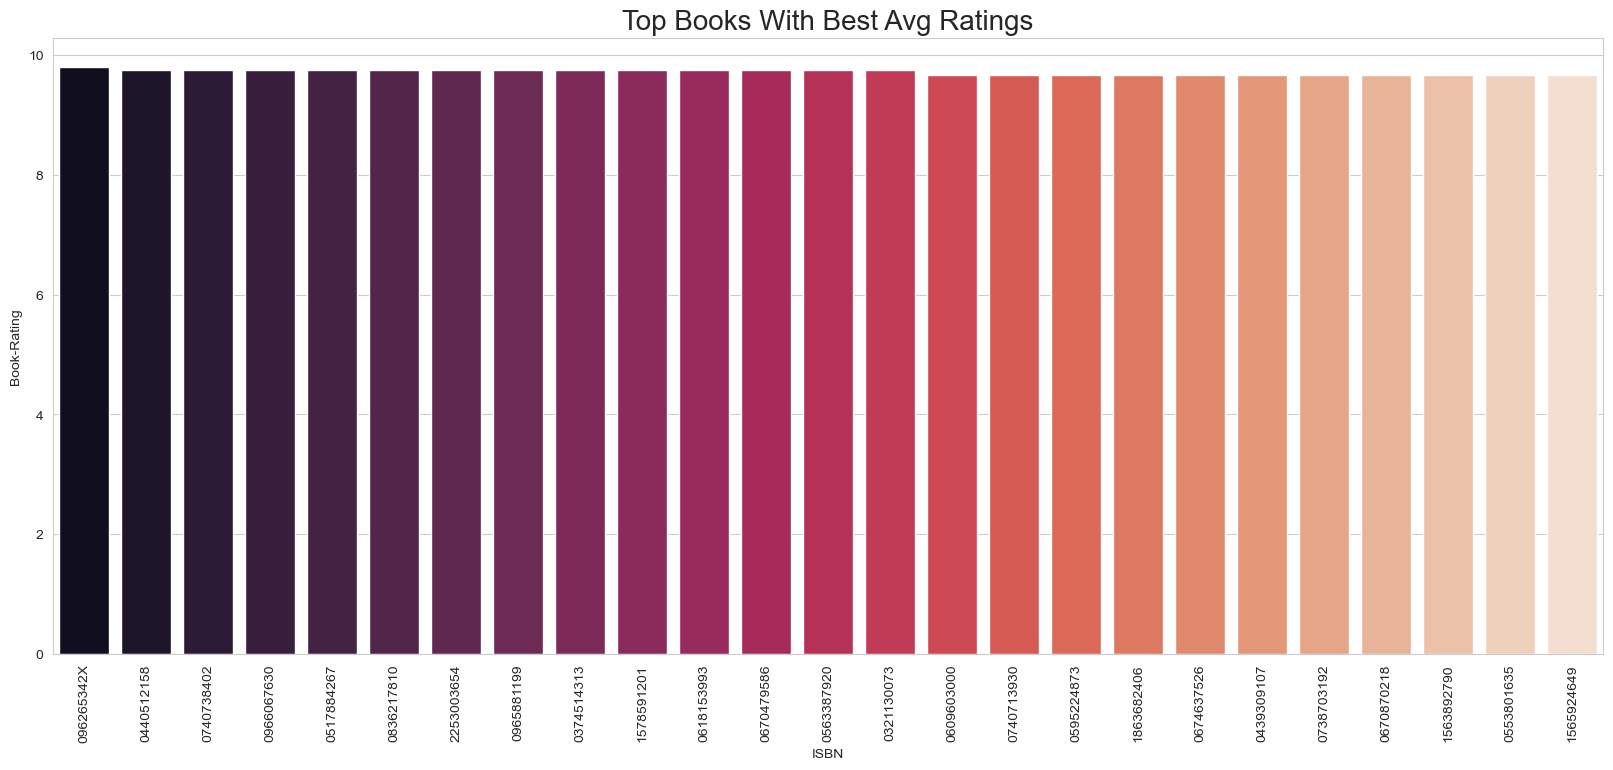

In [48]:
four=pd.DataFrame(new_df.groupby('ISBN').agg('mean')['Book-Rating'].sort_values(ascending=False))
five=four[four['Book-Rating']!=10.0][:25]
plt.figure(figsize=(20,8))
ax=sns.barplot(data=five,x=five.index,y='Book-Rating',palette='rocket')
ax.tick_params(axis='x',labelrotation=90)
plt.title('Top Books With Best Avg Ratings',fontdict={'fontsize':20})

plt.show()


# MODEL BUILDING (USER BASED)

In [49]:
user_review_counts = new_df.groupby('User-ID').size()

In [50]:
active_users = user_review_counts[user_review_counts >= 50].index.tolist()

filtered_df = new_df[new_df['User-ID'].isin(active_users)]

In [51]:
active_users=user_review_counts[user_review_counts >= 50]

In [52]:
filtered_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
18,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0,"ottawa, ontario, canada",49.0
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,"ottawa, ontario, canada",49.0
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,"ottawa, ontario, canada",49.0
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0,"ottawa, ontario, canada",49.0
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,"ottawa, ontario, canada",49.0
...,...,...,...,...,...,...,...,...,...
981178,1871592321,The Starry Wisdom : A Tribute to H P Lovecraft,H. P. Lovecraft,1995,Creation Books,39527,7,"santeramo in colle, bari, italy",32.0
981179,1882926935,The American Cause,Russell Kirk,2003,ISI Books,39527,9,"santeramo in colle, bari, italy",32.0
981180,0895261715,The Conservative Mind: From Burke to Eliot,Russell Kirk,2001,Regnery Publishing,39527,9,"santeramo in colle, bari, italy",32.0
981181,0877282102,The Equinox Volume 3 Number 1,Aleister Crowley,1992,Weiser Books,39527,7,"santeramo in colle, bari, italy",32.0


In [53]:
filtered_df.ISBN.value_counts()

0971880107    779
0316666343    556
0385504209    423
0060928336    372
0312195516    336
             ... 
0917627121      1
006061188X      1
0807111627      1
038533740X      1
0877282064      1
Name: ISBN, Length: 218497, dtype: int64

In [54]:
book_count=filtered_df.groupby('ISBN').size()
active_books=book_count[book_count>30].index.to_list()
filtered_df2=filtered_df[filtered_df['ISBN'].isin(active_books)]
filtered_df2


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9,"ottawa, ontario, canada",49.0
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6,"ottawa, ontario, canada",49.0
21,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400,0,"ottawa, ontario, canada",49.0
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,"ottawa, ontario, canada",49.0
23,0446364193,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,11400,0,"ottawa, ontario, canada",49.0
...,...,...,...,...,...,...,...,...,...
954037,0373483503,Macgregor Brides (Macgregors),Nora Roberts,1997,Silhouette,163759,5,"abertillery, wales, united kingdom",37.0
954040,0373483899,The Macgregors: Alan - Grant (The Macgregors),Nora Roberts,1999,Silhouette,163759,5,"abertillery, wales, united kingdom",37.0
954466,0553275976,The Bonfire of the Vanities,Tom Wolfe,1988,Bantam Books,223034,8,"toronto, ontario, canada",NaN
957217,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic,171076,9,"helena, montana, usa",29.0


In [55]:
user_rating=pd.pivot_table(index='User-ID',columns='ISBN',data=filtered_df2,values='Book-Rating')

In [56]:
user_rating

ISBN,000649840X,0020198906,002026478X,0020442203,0020442408,002542730X,0028604199,0060001453,006000438X,0060008032,...,1573229326,1573229385,1573229571,1573229725,1576737330,1592400876,1878424319,1885171080,193156146X,1931561648
User-ID,,,,,,,,,,,,,,,,,,,,,
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278418,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
user_rating.fillna(0,inplace=True)

In [58]:
user_rating

ISBN,000649840X,0020198906,002026478X,0020442203,0020442408,002542730X,0028604199,0060001453,006000438X,0060008032,...,1573229326,1573229385,1573229571,1573229725,1576737330,1592400876,1878424319,1885171080,193156146X,1931561648
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
user_sim=cosine_similarity(user_rating)

In [60]:
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.04769575,
        0.        ],
       [0.        , 1.        , 0.10465965, ..., 0.        , 0.        ,
        0.086389  ],
       [0.        , 0.10465965, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.04769575, 0.        , 0.        , ..., 0.        , 1.        ,
        0.08877649],
       [0.        , 0.086389  , 0.        , ..., 0.        , 0.08877649,
        1.        ]])

In [61]:
np.fill_diagonal(user_sim,0)

In [62]:
user_sim_df=pd.DataFrame(data=user_sim,index=filtered_df2['User-ID'].unique(),columns=filtered_df2['User-ID'].unique())
user_sim_df

,11400,11676,85526,96054,116866,177458,219008,263325,35704,110912,...,47605,82171,61667,22409,50859,67775,163759,223034,171076,39527
11400,0.000000,0.000000,0.00000,0.067751,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.053875,0.0,0.0,0.0,0.0,0.0,0.047696,0.000000
11676,0.000000,0.000000,0.10466,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.086389
85526,0.000000,0.104660,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
96054,0.067751,0.000000,0.00000,0.000000,0.0,0.0,0.067585,0.0,0.000000,0.157995,...,0.0,0.047681,0.000000,0.0,0.0,0.0,0.0,0.0,0.058100,0.000000
116866,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67775,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
163759,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.088003,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
223034,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.128766,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
171076,0.047696,0.000000,0.00000,0.058100,0.0,0.0,0.000000,0.0,0.072647,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.088776


In [63]:
simlr_user=user_sim_df[39527].sort_values(ascending=False).index[:5].to_list()
simlr_user

[162052, 241614, 81855, 116210, 269890]

In [64]:
simbooks=user_rating.loc[simlr_user].values.argsort()

In [65]:
simbooks

array([[   0, 1566, 1567, ..., 1289, 2210, 1030],
       [   0, 1571, 1572, ...,  791,  775, 2362],
       [1181, 1569, 1570, ..., 1881,    0, 1811],
       [   0, 1570, 1571, ..., 2362,  953, 1631],
       [   0, 1568, 1569, ..., 1783, 1989,  194]], dtype=int64)

In [66]:
simbooks=user_rating.loc[simlr_user].values.argsort()[:,-1]

In [67]:
book_isbn=user_rating.columns.values[simbooks]
book_isbn

array(['0440219078', '1931561648', '0590660543', '0553274503',
       '0142001805'], dtype=object)

In [68]:
rec_book=books[books['ISBN']=='1931561648']
rec_book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4778,1931561648,The Time Traveler's Wife (Today Show Book Club...,Audrey Niffenegger,2003,MacAdam/Cage Publishing,http://images.amazon.com/images/P/1931561648.0...,http://images.amazon.com/images/P/1931561648.0...,http://images.amazon.com/images/P/1931561648.0...


In [69]:
rec_book['Book-Title']

4778    The Time Traveler's Wife (Today Show Book Club...
Name: Book-Title, dtype: object

In [70]:
book_names=books[books['ISBN'].isin(book_isbn)]['Book-Title'].tolist()

In [71]:
for i in book_names[:4]:
    print(i)

The Giver (21st Century Reference)
Northern Lights (His Dark Materials S.)
Flowers for Algernon (Bantam Classic)
The Eyre Affair: A Novel


In [72]:
new_df.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [73]:
user_sim_df.loc[11400]

11400     0.000000
11676     0.000000
85526     0.000000
96054     0.067751
116866    0.000000
            ...   
67775     0.000000
163759    0.000000
223034    0.000000
171076    0.047696
39527     0.000000
Name: 11400, Length: 2992, dtype: float64

In [74]:
user_sim_df.dtypes

11400     float64
11676     float64
85526     float64
96054     float64
116866    float64
           ...   
67775     float64
163759    float64
223034    float64
171076    float64
39527     float64
Length: 2992, dtype: object

In [75]:
user_sim_df[11400]

11400     0.000000
11676     0.000000
85526     0.000000
96054     0.067751
116866    0.000000
            ...   
67775     0.000000
163759    0.000000
223034    0.000000
171076    0.047696
39527     0.000000
Name: 11400, Length: 2992, dtype: float64

In [76]:

def recommend(userid):
    book_name=[]
    book_urls=[]
    book_authors=[]
    book_years=[]
    simlr_user=user_sim_df[userid].sort_values(ascending=False).index[:5].to_list()
    simbooks=user_rating.loc[simlr_user].values.argsort()[:,-1]
    book_isbn=user_rating.columns.values[simbooks]
    book_names=(books[books['ISBN'].isin(book_isbn)]['Book-Title'].tolist())
    book_names=book_names[:6]
    
    book_author=(books[books['ISBN'].isin(book_isbn)]['Book-Author'].tolist())
    book_author=book_author[:6]
    
    book_url=(books[books['ISBN'].isin(book_isbn)]['Image-URL-L'].tolist())
    book_url=book_url[:6]
    
    book_year=(books[books['ISBN'].isin(book_isbn)]['Year-Of-Publication'].tolist())
    book_year=book_year[:6]
    
    for i in book_names:
        book_name.append(i)
    for j in book_author:
        book_authors.append(j)
    for k in book_url:
        book_urls.append(k)
    for m in book_year:
        book_years.append(m)
        
    return book_name,book_authors,book_years,book_urls

In [77]:
import pickle

In [78]:
pickle.dump(user_sim_df,open('user_sim_df.pkl','wb'))

In [79]:
pickle.dump(user_rating,open('user_rating.pkl','wb'))

In [80]:
pickle.dump(books,open('books.pkl','wb'))

In [81]:
recommend(39527)

(['The Giver (21st Century Reference)',
  'Northern Lights (His Dark Materials S.)',
  'Flowers for Algernon (Bantam Classic)',
  'The Eyre Affair: A Novel',
  "The Time Traveler's Wife (Today Show Book Club #15)"],
 ['LOIS LOWRY',
  'Philip Pullman',
  'DANIEL KEYES',
  'Jasper Fforde',
  'Audrey Niffenegger'],
 [1994, 1998, 1984, 2003, 2003],
 ['http://images.amazon.com/images/P/0440219078.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0590660543.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0553274503.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0142001805.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/1931561648.01.LZZZZZZZ.jpg'])

In [82]:

def recommend1(userid):
    book_name=[]
    book_urls=[]
    book_details=[]
    simlr_user=user_sim_df[userid].sort_values(ascending=False).index[:5].to_list()
    simbooks=user_rating.loc[simlr_user].values.argsort()[:,-1]
    book_isbn=user_rating.columns.values[simbooks]
    book_names=(books[books['ISBN'].isin(book_isbn)]['Book-Title'].tolist())
    book_names=book_names[:6]
    
    book_detail=(books[books['ISBN'].isin(book_isbn)][['Book-Author','Year-Of-Publication','Publisher']])
    book_detail=book_detail[:6]
    
    book_url=(books[books['ISBN'].isin(book_isbn)]['Image-URL-L'].tolist())
    book_url=book_url[:6]
    
    for i in book_names:
        book_name.append(i)
    for j in book_detail.values:
        book_details.append(j)
    for k in book_url:    
        book_urls.append(k)
    
        
    return book_name,book_details,book_urls

In [83]:
recommend1(241614)

(['The Diary of Ellen Rimbauer: My Life at Rose Red',
  'Along Came a Spider (Alex Cross Novels)',
  'Sister of My Heart',
  'Harry Potter and the Prisoner of Azkaban (Book 3)',
  'The Pied Piper'],
 [array(['Joyce Reardon', 2001, 'Hyperion'], dtype=object),
  array(['James Patterson', 1993, 'Warner Books'], dtype=object),
  array(['Chitra Banerjee Divakaruni', 2000, 'Anchor Pub'], dtype=object),
  array(['J. K. Rowling', 2001, 'Scholastic'], dtype=object),
  array(['Ridley Pearson', 1999, 'Hyperion'], dtype=object)],
 ['http://images.amazon.com/images/P/0786868015.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0446364193.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/038548951X.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg',
  'http://images.amazon.com/images/P/0786889551.01.LZZZZZZZ.jpg'])

In [84]:
top_book=new_df['ISBN'].value_counts().index[:5]
top_book.tolist()

['0971880107', '0316666343', '0385504209', '0060928336', '0312195516']

In [85]:
new_df[new_df['ISBN'].isin(top_book)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7,"ottawa, ontario, canada",49.0
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,11676,6,NaN,NaN
221,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",11676,5,NaN,NaN
253,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11676,10,NaN,NaN
321,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,11676,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...
834136,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,268035,0,"millersburg, ,",NaN
834146,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,269983,0,"west liberty, iowa, usa",38.0
834148,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,272987,10,"greenfield, massachusetts, usa",NaN
834150,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,273065,10,"coquitlam, british columbia, canada",NaN


In [86]:
new_df[new_df['ISBN'].isin(top_book)]['Book-Title'].unique()

array(['The Red Tent (Bestselling Backlist)', 'Wild Animus',
       'The Lovely Bones: A Novel', 'The Da Vinci Code',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel'], dtype=object)

In [87]:
books_ratings[books_ratings['ISBN'].isin(top_book)]['Image-URL-L'].unique()

array(['http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg'],
      dtype=object)

In [88]:
books_ratings[books_ratings['ISBN'].isin(top_book)]['Image-URL-L'].unique()

array(['http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg',
       'http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg'],
      dtype=object)

In [89]:
books_ratings[books_ratings['ISBN'].isin(top_book)]['Year-Of-Publication'].unique()

array([2004, 2002, 1998, 2003, 1997], dtype=object)

In [90]:
bok=books_ratings[books_ratings['ISBN'].isin(top_book)]['Publisher'].unique().tolist()
bok

['Too Far', 'Little, Brown', 'Picador USA', 'Doubleday', 'Perennial']

In [91]:
Total_ratings=new_df.groupby('ISBN').count()['Book-Rating'].reset_index()
Total_ratings.rename(columns={'Book-Rating':'Total-Ratings'},inplace=True)
Total_ratings

,ISBN,Total-Ratings
0,0000913154,1
1,0001010565,2
2,0001046438,1
3,0001046713,1
4,000104687X,1
...,...,...
270146,B000234N76,1
270147,B000234NC6,1
270148,B00029DGGO,1
270149,B0002JV9PY,1


In [92]:
new_df.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication     object
Publisher               object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object